# Preparación de datos

In [1]:
import Datos

dataset_heart = Datos.Datos('Datasets/heart.csv')
dataset_wdbc = Datos.Datos('Datasets/wdbc.csv')
dataset_iris = Datos.Datos('Datasets/iris.csv')

dataset_heart_norm = Datos.Datos('Datasets/heart.csv')
dataset_wdbc_norm = Datos.Datos('Datasets/wdbc.csv')
dataset_iris_norm = Datos.Datos('Datasets/iris.csv')

heart_data = dataset_heart.datos
wdbc_data = dataset_wdbc.datos
iris_data = dataset_iris.datos

dataset_heart_norm.datos, _, _ = Datos.estandarizarDatos(dataset_heart_norm.datos, dataset_heart_norm.nominalAtributos, dataset_heart_norm.diccionarios)
dataset_wdbc_norm.datos, _, _ = Datos.estandarizarDatos(dataset_wdbc_norm.datos, dataset_wdbc_norm.nominalAtributos, dataset_wdbc_norm.diccionarios)
dataset_iris_norm.datos, _, _ = Datos.estandarizarDatos(dataset_iris_norm.datos, dataset_iris_norm.nominalAtributos, dataset_iris_norm.diccionarios)

heart_data_norm = dataset_heart_norm.datos
wdbc_data_norm = dataset_wdbc_norm.datos
iris_data_norm = dataset_iris_norm.datos

# Apartado 1 
Resultados de la clasificación mediante regresión logística
en los conjuntos de datos heart y wdbc. Probar con dos o
tres valores para la constante de aprendizaje y el número
de pasos.

Error mínimo regresión logística en Heart:0.39871703492516036, obtenido con 500 épocas y ratio de aprendizaje 0.01
Error mínimo regresión logística en WDBC: 0.08256481912746468, obtenido con 500 épocas y ratio de aprendizaje 0.1


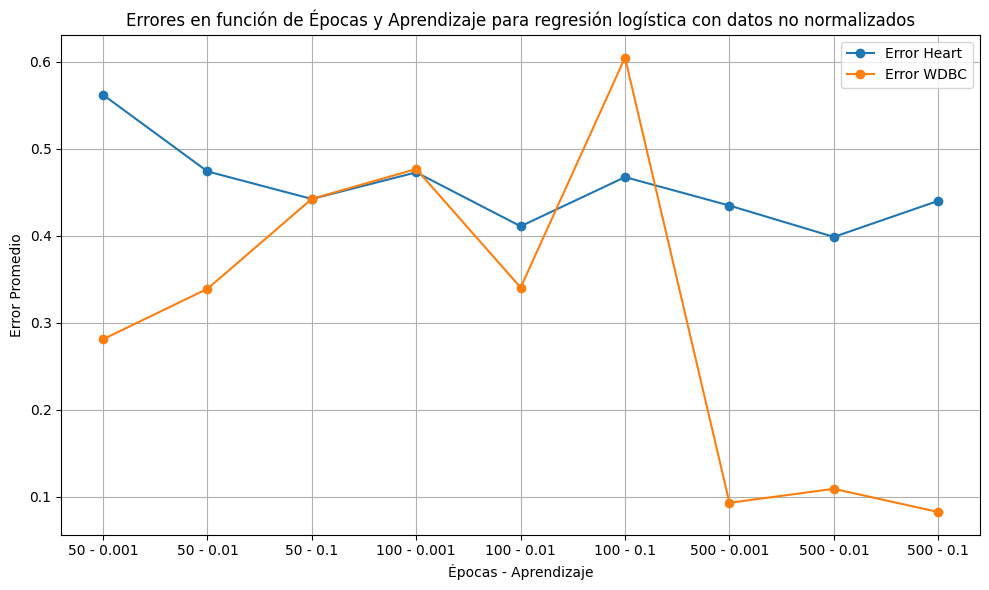

In [2]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC: {min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos no normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Error mínimo regresión logística en Heart:0.1710857685911143, obtenido con 500 épocas y ratio de aprendizaje 0.1
Error mínimo regresión logística en WDBC:0.024576929048284426, obtenido con 500 épocas y ratio de aprendizaje 0.1


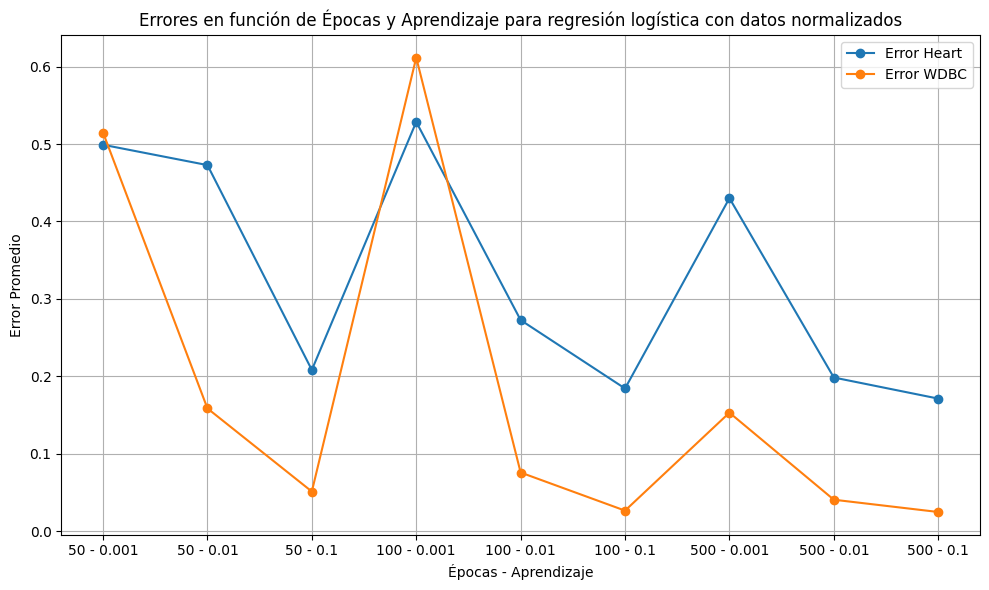

In [3]:
import numpy as np
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(rl.validacion(validacion_cruzada, dataset_heart_norm, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(rl.validacion(validacion_cruzada, dataset_wdbc_norm, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

print(f"Error mínimo regresión logística en Heart:{min(error_heart)}, obtenido con {epocas[error_heart.index(min(error_heart)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart.index(min(error_heart)) % 3]}")
print(f"Error mínimo regresión logística en WDBC:{min(error_wdbc)}, obtenido con {epocas[error_wdbc.index(min(error_wdbc)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc.index(min(error_wdbc)) % 3]}")

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje para regresión logística con datos normalizados")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Apartado 2
Resultados de la clasificación utilizando los algoritmos de
Scikit-Learn para regresión logística. Comparación con los
resultados de la implementación propia. En los resultados
utilizar los mismos valores de constante de aprendizaje y
pasos que en la implementación propia.

Error mínimo regresión logística SKlearn en Heart: 0.16239011641720125, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en Heart: 0.16242575433594678, obtenido con 500 épocas y ratio de aprendizaje 0.01
Error mínimo regresión logística SKlearn en WDBC: 0.021068157118459864, obtenido con 50 épocas y ratio de aprendizaje 0.1
Error mínimo SGD en WDBC: 0.026346840552709205, obtenido con 50 épocas y ratio de aprendizaje 0.001


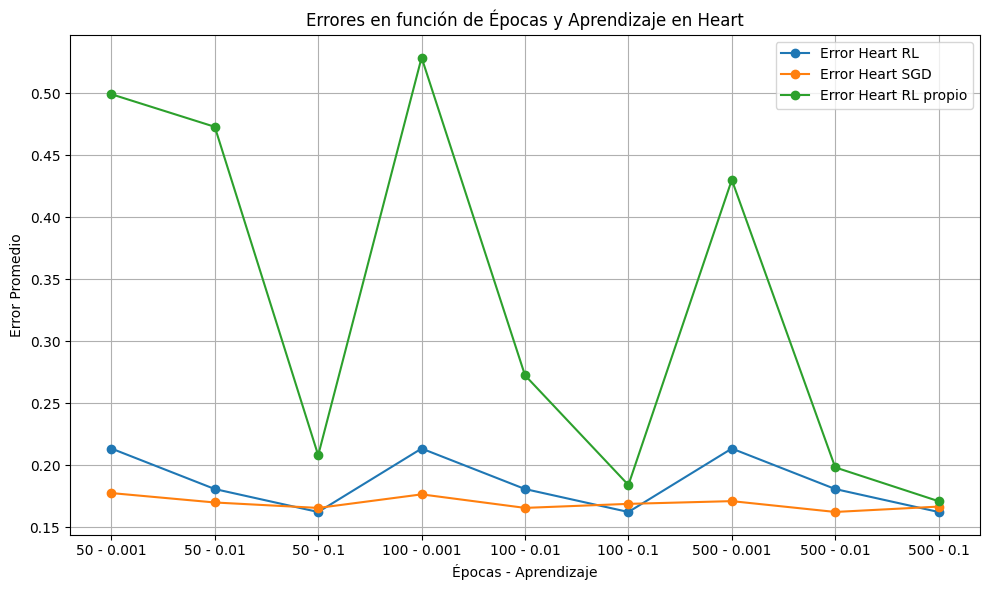

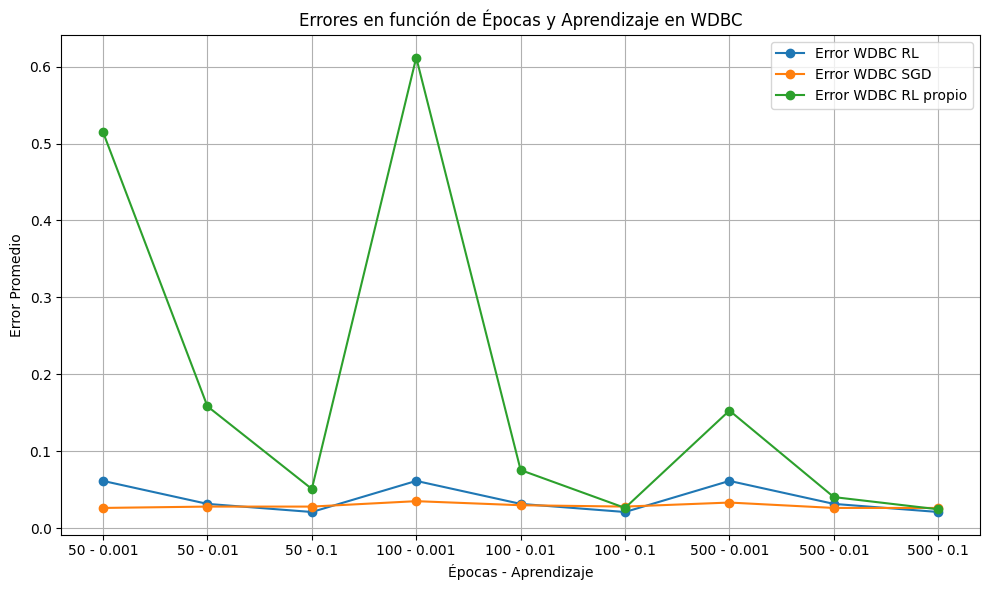

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ClasificadorRegresionLogistica import ClasificadorRegresionLogisticaSK, ClasificadorSGD
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

error_heart_logsk = []
error_wdbc_logsk = []
error_heart_sgdsk = []
error_wdbc_sgdsk = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl_sk = ClasificadorRegresionLogisticaSK(maxiter=epoca, aprendizaje=aprendizaje)
        sgd_sk = ClasificadorSGD(maxiter=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_heart_norm, sgd_sk)))
        error_heart_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_heart_norm, rl_sk)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc_sgdsk.append(np.mean(sgd_sk.validacion(validacion_cruzada, dataset_wdbc_norm, sgd_sk)))
        error_wdbc_logsk.append(np.mean(rl_sk.validacion(validacion_cruzada, dataset_wdbc_norm, rl_sk)))

print(f"Error mínimo regresión logística SKlearn en Heart: \
{min(error_heart_logsk)}, obtenido con {epocas[error_heart_logsk.index(min(error_heart_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_logsk.index(min(error_heart_logsk)) % 3]}")
print(f"Error mínimo SGD en Heart: \
{min(error_heart_sgdsk)}, obtenido con {epocas[error_heart_sgdsk.index(min(error_heart_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_heart_sgdsk.index(min(error_heart_sgdsk)) % 3]}")

print(f"Error mínimo regresión logística SKlearn en WDBC: \
{min(error_wdbc_logsk)}, obtenido con {epocas[error_wdbc_logsk.index(min(error_wdbc_logsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_logsk.index(min(error_wdbc_logsk)) % 3]}")
print(f"Error mínimo SGD en WDBC: \
{min(error_wdbc_sgdsk)}, obtenido con {epocas[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) // 3]} épocas y ratio de aprendizaje {aprendizajes[error_wdbc_sgdsk.index(min(error_wdbc_sgdsk)) % 3]}")

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart_logsk, label="Error Heart RL", marker='o')
plt.plot(labels, error_heart_sgdsk, label="Error Heart SGD", marker='o')
plt.plot(labels, error_heart, label="Error Heart RL propio", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje en Heart")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(labels, error_wdbc_logsk, label="Error WDBC RL", marker='o')
plt.plot(labels, error_wdbc_sgdsk, label="Error WDBC SGD", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC RL propio", marker='o')
plt.title("Errores en función de Épocas y Aprendizaje en WDBC")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Apartado 3
Para la evaluación de los Espacios ROC y la Curva AUC de los modelos pertinentes para nuestros 3 datasets(HEART, IRIS, WDBC), usarmeos los siguientes hiperparámetros y condiciones.

Para Naive Bayes usaremos una Validación Simple debido a que en la primera práctica vimos que fue lo más óptimo a la hora de analizar los resultados.

Para KNN, usaremos una Validación Simple + un valor de K=11.

Y finalmente, para nuestra regresión lineal usaremos un n_epoch = 500 y un learning rate de 0.1, podemos ver como en el apartado anterior obtuvimos los mejores resultados con dichos hiperparámetros.




Dataset: HEART

Clasificador: Naive Bayes
Predicciones binarias generadas: [0 0 0 0 0 1 1 1 1 0]
TP: 142, FP: 22, TN: 94, FN: 17
TPR: 0.8930817610062893, FPR: 0.1896551724137931

Clasificador: KNN
Predicciones binarias generadas: [0 0 0 0 0 1 1 1 1 0]
TP: 129, FP: 20, TN: 96, FN: 30
TPR: 0.8113207547169812, FPR: 0.1724137931034483

Clasificador: Regresión Logística
Scores generados por el modelo: [0.19351979 0.04093633 0.21521897 0.0725706  0.44288294 0.97871391
 0.95259859 0.93814952 0.88845096 0.21652017]
Predicciones binarias generadas: [0 0 0 0 0 1 1 1 1 0]
TP: 129, FP: 20, TN: 96, FN: 30
TPR: 0.8113207547169812, FPR: 0.1724137931034483
AUC: 0.8863315983517676


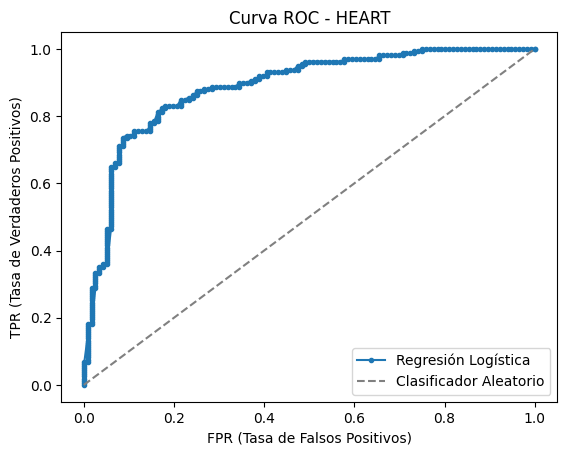

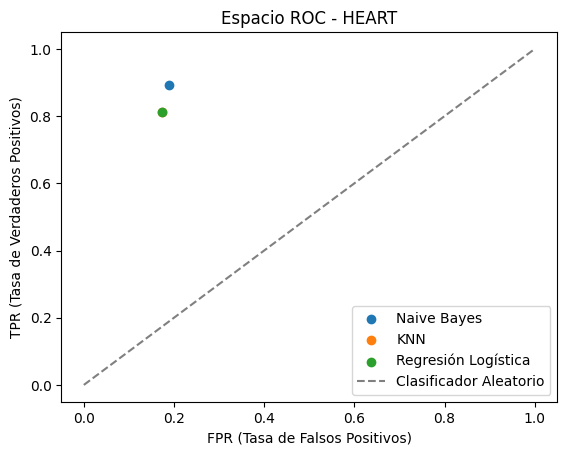


Dataset: WDBC

Clasificador: Naive Bayes
Predicciones binarias generadas: [0 0 0 1 1 0 1 0 0 0]
TP: 65, FP: 6, TN: 93, FN: 7
TPR: 0.9027777777777778, FPR: 0.06060606060606061

Clasificador: KNN
Predicciones binarias generadas: [0 0 0 1 1 0 1 0 0 0]
TP: 67, FP: 2, TN: 97, FN: 5
TPR: 0.9305555555555556, FPR: 0.020202020202020204

Clasificador: Regresión Logística
Scores generados por el modelo: [2.22072490e-04 4.87767661e-01 1.14255865e-03 9.87368519e-01
 9.99998128e-01 5.51410641e-04 9.99999812e-01 1.41161559e-03
 1.20400989e-05 3.66295735e-03]
Predicciones binarias generadas: [0 0 0 1 1 0 1 0 0 0]
TP: 70, FP: 5, TN: 94, FN: 2
TPR: 0.9722222222222222, FPR: 0.050505050505050504
AUC: 0.9914421997755334


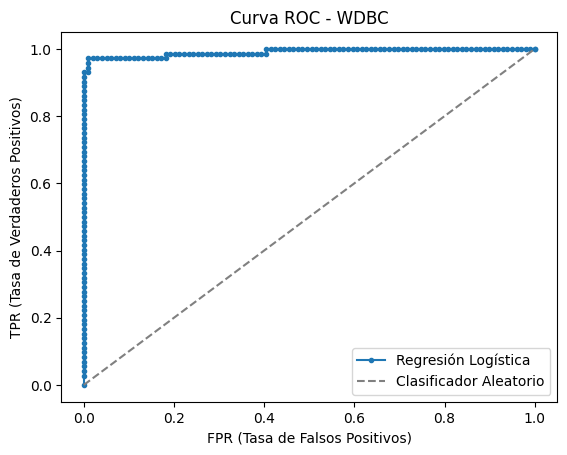

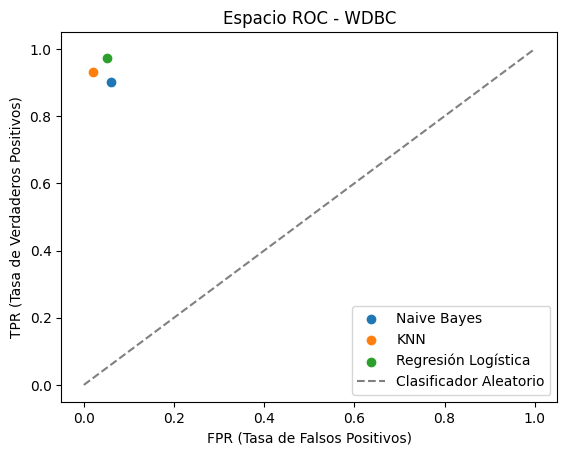


Dataset: IRIS

Clasificador: Naive Bayes
Predicciones binarias generadas: [1 1 1 1 1 1 0 1 1 0]
TP: 57, FP: 7, TN: 105, FN: 2
TPR: 0.9661016949152542, FPR: 0.0625

Clasificador: KNN
Predicciones binarias generadas: [1 1 1 1 1 1 0 1 1 0]
TP: 56, FP: 3, TN: 109, FN: 3
TPR: 0.9491525423728814, FPR: 0.026785714285714284

Clasificador: Regresión Logística
Scores generados por el modelo: [9.99998962e-01 9.99993621e-01 9.93668263e-01 9.99508810e-01
 9.99987804e-01 9.97599497e-01 1.35252238e-04 9.99999678e-01
 9.50366598e-01 3.84721524e-01]
Predicciones binarias generadas: [1 1 1 1 1 1 0 1 1 0]
TP: 58, FP: 4, TN: 108, FN: 1
TPR: 0.9830508474576272, FPR: 0.03571428571428571
AUC: 0.9977300242130751


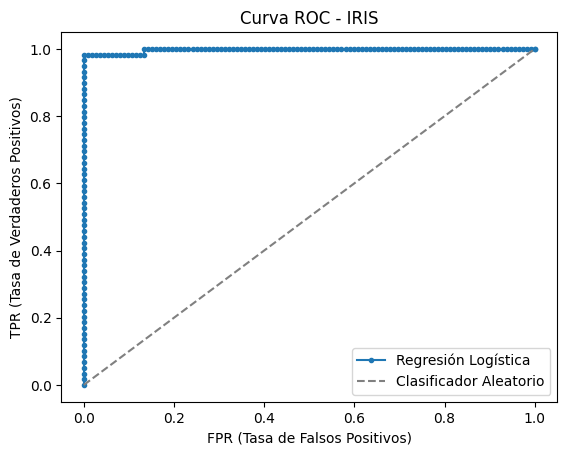

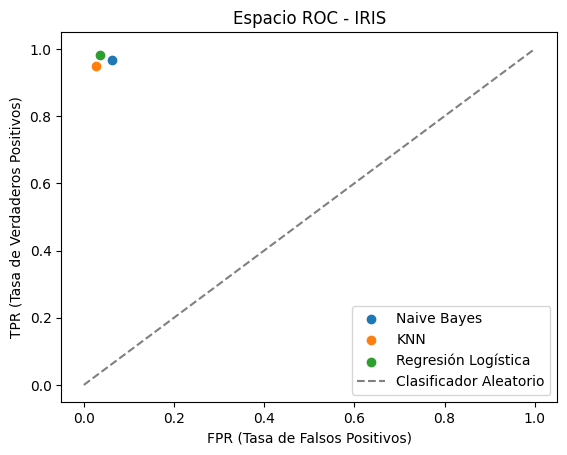

In [5]:
import Datos
import numpy as np
from EstrategiaParticionado import ValidacionSimple
from ClasificadorNB import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
import matplotlib.pyplot as plt

datasets = ['Datasets/heart.csv', 'Datasets/wdbc.csv', 'Datasets/wdbc.csv']
nombres_datasets = ['HEART', 'WDBC', 'IRIS']

clasificadores = {
    'Naive Bayes': ClasificadorNaiveBayes(),
    'KNN': ClasificadorKNN(K=11),
    'Regresión Logística': ClasificadorRegresionLogistica(epocas=500, aprendizaje=0.1)
}

for idx_dataset, dataset_name in enumerate(datasets):
    print(f"\nDataset: {nombres_datasets[idx_dataset]}")
    dataset = Datos.Datos(dataset_name)
    
    # Preparar validación simple
    particionado = ValidacionSimple(1, 0.3)  
    particiones = particionado.creaParticiones(dataset.datos)
    
    particion = particiones[0]
    datos_train = dataset.extraeDatos(particion.indicesTrain).reset_index(drop=True)
    datos_test = dataset.extraeDatos(particion.indicesTest).reset_index(drop=True)
    
    atributos_nominales = dataset.nominalAtributos
    diccionario = dataset.diccionarios
    
    # Normalizar los datos con la función `estandarizarDatos`
    datos_train, media, std = Datos.estandarizarDatos(datos_train, atributos_nominales, diccionario)
    datos_test, _, _ = Datos.estandarizarDatos(datos_test, atributos_nominales, diccionario, media, std)
    
    TPRs = []
    FPRs = []
    nombres_clasificadores = []
    
    for nombre_clasificador, clasificador in clasificadores.items():
        print(f"\nClasificador: {nombre_clasificador}")

        clasificador.entrenamiento(datos_train, atributos_nominales, diccionario)

        if nombre_clasificador == 'Regresión Logística':
            scores, predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario, return_scores=True)
            print("Scores generados por el modelo:", scores[:10])
            print("Predicciones binarias generadas:", predicciones[:10])

        else:
            predicciones = clasificador.clasifica(datos_test, atributos_nominales, diccionario)
            print("Predicciones binarias generadas:", predicciones[:10])

        TP, FP, TN, FN = clasificador.matriz_confusion(datos_test, predicciones)
        print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")
        
        # Calcular TPR y FPR
        if (TP + FN) > 0:
            TPR = TP / (TP + FN)
        else:
            TPR = 0  # Asignar 0 si el denominador es 0  

        if (FP + TN) > 0:
            FPR = FP / (FP + TN)
        else:
            FPR = 0 
        print(f"TPR: {TPR}, FPR: {FPR}")
        
        TPRs.append(TPR)
        FPRs.append(FPR)
        nombres_clasificadores.append(nombre_clasificador)

        # Curva ROC para la Regresión Logística
        if nombre_clasificador == 'Regresión Logística':
            clases_reales = datos_test['Class'].values

            unique_scores = np.unique(scores)
            umbrales = sorted(unique_scores, reverse=True) 

            TPR_list = []
            FPR_list = []
            
            for umbral in umbrales:
                pred_binarias = (scores >= umbral).astype(int)  # True se convierte en 1, False en 0

                TP_umbral, FP_umbral, TN_umbral, FN_umbral = clasificador.matriz_confusion(datos_test, pred_binarias)

                # Calcular TPR (True Positive Rate)
                if (TP_umbral + FN_umbral) > 0:
                    TPR_umbral = TP_umbral / (TP_umbral + FN_umbral)
                else:
                    TPR_umbral = 0  # Asignar 0 si el denominador es 0  

                # Calcular FPR (False Positive Rate)
                if (FP_umbral + TN_umbral) > 0:
                    FPR_umbral = FP_umbral / (FP_umbral + TN_umbral)
                else:
                    FPR_umbral = 0  

                TPR_list.append(TPR_umbral)
                FPR_list.append(FPR_umbral) 
            
            TPR_list.insert(0, 0)
            TPR_list.append(1)

            FPR_list.insert(0, 0)
            FPR_list.append(1)

            sorted_indices = np.argsort(FPR_list)
            
            FPR_list = np.array(FPR_list)[sorted_indices]
            TPR_list = np.array(TPR_list)[sorted_indices]

            auc = 0
            for i in range(1, len(FPR_list)):  # Fórmula del cálculo del área de un trapecio (base * (altura derecha + altura izq) /2)
                auc += (FPR_list[i] - FPR_list[i-1]) * (TPR_list[i] + TPR_list[i-1]) / 2
            auc = auc 
            print(f"AUC: {auc}")

            plt.figure()
            plt.plot(FPR_list, TPR_list, marker='.', label='Regresión Logística')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
            plt.title(f'Curva ROC - {nombres_datasets[idx_dataset]}')
            plt.xlabel('FPR (Tasa de Falsos Positivos)')
            plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
            plt.legend()
            plt.show()

    plt.figure()
    for i, nombre_clasificador in enumerate(nombres_clasificadores):
        plt.scatter(FPRs[i], TPRs[i], label=nombre_clasificador)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Clasificador Aleatorio')
    plt.title(f'Espacio ROC - {nombres_datasets[idx_dataset]}')
    plt.xlabel('FPR (Tasa de Falsos Positivos)')
    plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
    plt.legend()
    plt.show()


Comenzaremos analizando los resultados obtenidos para el dataset de 'HEART'.

Podemos observar que para nuestro Naive Bayes, obtenemos un valor de TPR = 0.89 lo cual podríamos considerarlo como un valor 'alto', aunque su valor de FPR = 0.16, nos propone que aunque Naive Bayes obtiene una buena tasa de verdaderos positivos, también tiene una tasa de falsos negativos más alto que el resto de casos que vamos a explorar. Por lo general es un modelo sólido.

El segundo modelo a analizar, el KNN con K = 11, nos otorga unos valores de TPR = 0.85, ligeramente inferior a NB pero con un FPR = 0.14, identificando menos falsos negativos que NB.

Por último, nuestra Regresión Logística obtiene unos reusltados parecidos a KNN, con un TPR = 0.83, el más bajo de todos y con un FPR = 0.14.

Ahora bien, dado el contexto de este dataset, el cual se basa en la detección de enfermedades, debemos priorizar el valor de TPR.ya que identificar correctamente los casos positivos (personas enfermas) es generalmente más importante que minimizar los falsos positivos (personas sanas mal diagnosticadas). A pesar de tener el valor más alto de FPR de los 3 modelos, su superioridad para la detección de los casos positivos nos hacen decantarnos hacia el algoritmo de Naive Bayes usando Validación Simple.


El segundo dataset a analizar es el de WDBC.

El Naive Bayes propio consigue un gran desempeño con un TPR = 0.93 y un FPR = 0.035. Éstos son valores que determinan un modelo exitoso.

El KNN mejora el rendimiento de Naive Bayes se manera significativa, destacando un mejor TPR, con un valor de 0.95, y con una mejora considerable en el FPR, con FPR = 0.018. Esto nos indica que para este dataset nuetsro KNN obtiene una tasa de falsos positivos menor a la de NB.

Finalmente, el modelo de Regresión Logística es el que mejor se adapta sin ningún tipo de duda, podemos observar en el espacio ROC la manera en la que se ajusta de manera casi perfecta a los datos. Hemos obtenido un valor de TPR = 1.0(PERFECTO) y un FPR = 0.044

Aunque todos los clasificadores funcionan bien, la Regresión Logística supera a los demás con una tasa perfecta de verdaderos positivos y un AUC casi perfecto.


Por último, tenemos el dataset de 'IRIS'.

Para nuestro Naive Bayes, hemos logrado un TPR = 0.92 y un FPR = 0.08, mostrando un desempeño muy bueno con un TPR alto y un FOR moderado.

El KNN propio mejora el TPR anterior con un valor de 0.94 y mantiene un FPR parecido, con un valor también de 0.09. KNN es capaz de lograr un excelente equilibrio entre un TPR muy alto y un FPR moderado.

Finalmente, una vez más, nuetsra Regresión Logística mejora con creces a ambos modelos con una tasa de positivos reales casi perfecta. TPR = 0.98 y un FPR igualado a los anteriores (0.09). 

Es por ello que para este último datset concluimos conque la Regresión Logística es el que mejor se ha conseguido adaptar, aunque los resultados de los otros 2 modelos también son muy aceptables.

Una vez terminada esta observación de los 3 datasets, podemos concluir que:

El éxito de la regresión logística en los datasets WDBC e IRIS, en comparación con el dataset HEART, se debe principalmente a las diferencias en la naturaleza de las características y la separabilidad de las clases en los datos.

En el caso de HEART, el dataset contiene una combinación de variables categóricas y numéricas que a pesar de que sean relevantes, introducen cierta complejidad y ruido al modelo. Desde la perspectiva de la Regresión Logística, esto produce un efecto adverso a la hora de encontrar patrones que sean considerados efectivos debido a que no es un modelo capacitado para manejar relaciones no lineales o lo que vendría siendo en nuestro caso, interacciones complejas entre variables.

Por otro lado, en WDBC, las características son exclusivamente numéricas, continuas altamenete correlacionadas entre sí, lo que permite a la regresión logística modelar eficazmente las relaciones entre las variables y las clases. En IRIS, el dataset es aún más simple, con solo cuatro características numéricas que describen dimensiones físicas de flores, y las clases están claramente separadas en el espacio de características, lo que facilita la identificación de límites de decisión lineales.

# Apartado 4
Análisis descrito en la sección de Tareas para el algoritmo de
clustering K-means, es decir:

• Para K=3, comprobar si se puede asignar de forma unívoca cada
clúster a un tipo de flor atendiendo a la clase mayoritaria de los
patrones agrupados por clúster

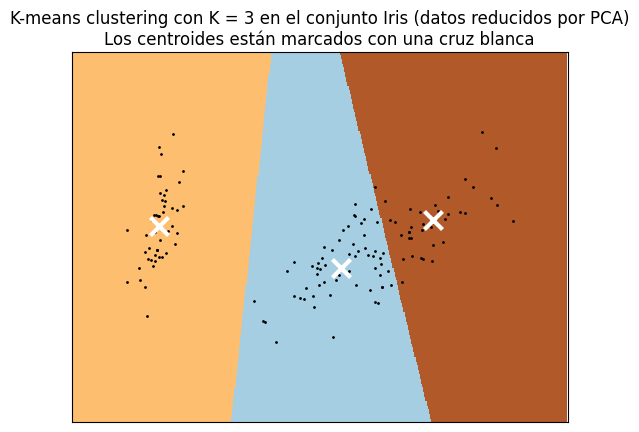

In [6]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = iris_data.drop(columns='Class').values
y = iris_data['Class'].values

kmeans = ClusteringKMeans(3)
centroides, asignaciones = kmeans.kmeans(iris_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
centroides_reducidos = pca.transform(centroides)

h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_data)

distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
Z = np.argmin(distancias_grid, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

plt.scatter(
    centroides_reducidos[:, 0],
    centroides_reducidos[:, 1],
    marker='x',
    s=169,
    linewidths=3,
    color='w',
    zorder=10
)

plt.title(
    f"K-means clustering con K = {3} en el conjunto Iris (datos reducidos por PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


• Analizar qué tipos de flor se identifican más fácilmente (con menos
errores), cuales más difícilmente (con más errores), y cuales se
confunden entre ellos. Para ello se puede hacer uso de la matriz de
confusión multiclase a partir del número de puntos en cada clase y
sabiendo que hay 50 ejemplos de cada tipo de flor.

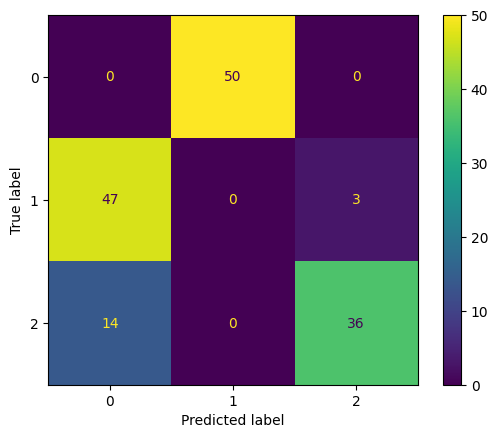

In [7]:
matriz_confusion = confusion_matrix(y, asignaciones)
disp = ConfusionMatrixDisplay(matriz_confusion)
disp.plot()
plt.show()

• Probar con otros valores de K = [2,4,5] y comparar los resultados con
los obtenidos para k=3. ¿Cuál sería el mejor K para este problema?

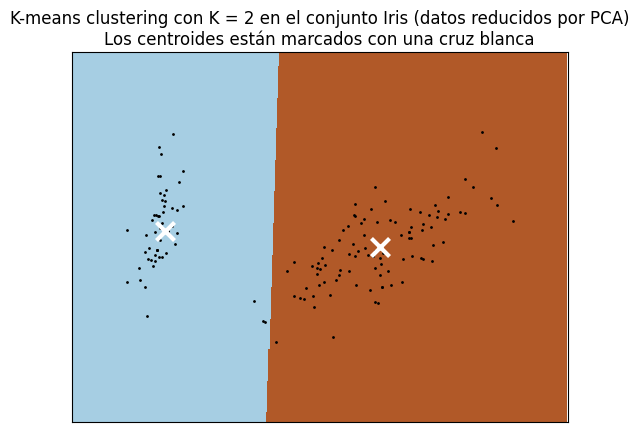

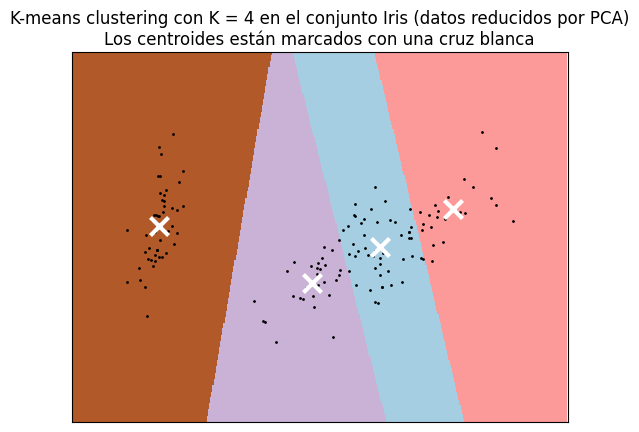

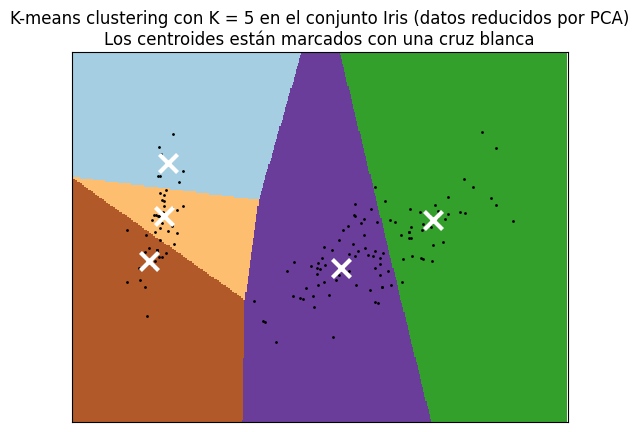

In [8]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k_values = [2,4,5]

for k in k_values:
    
    X = iris_data.drop(columns='Class').values
    y = iris_data['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data)
    
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()



• Analizar si se obtendrían otros resultados
normalizando los datos

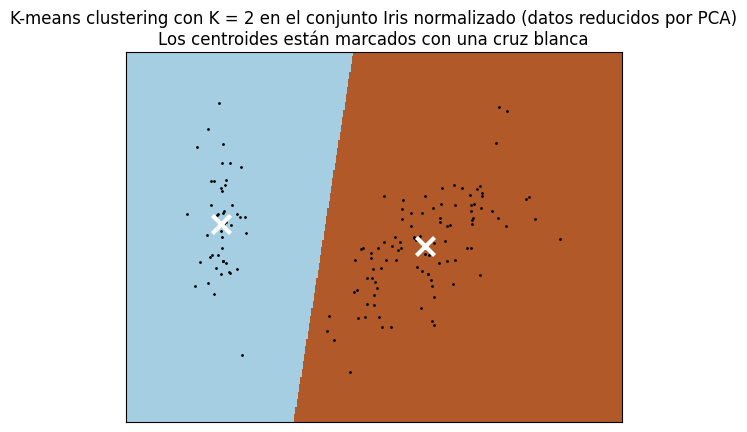

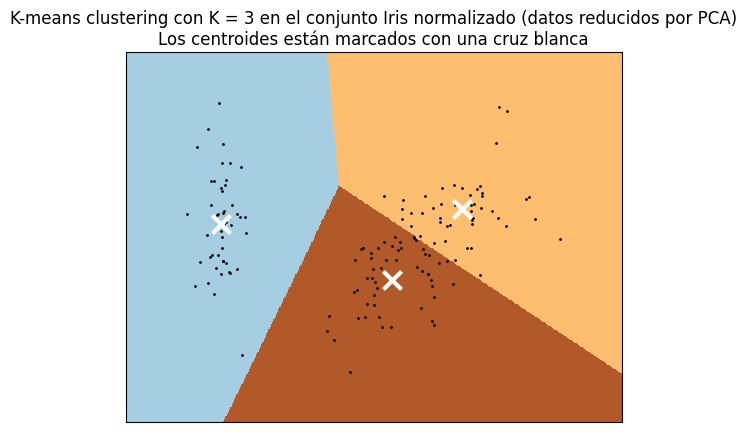

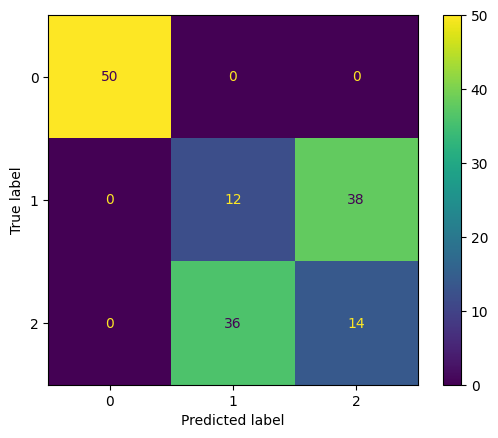

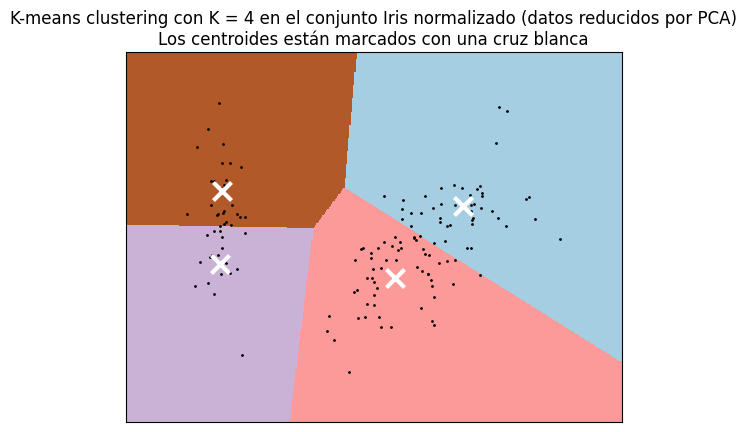

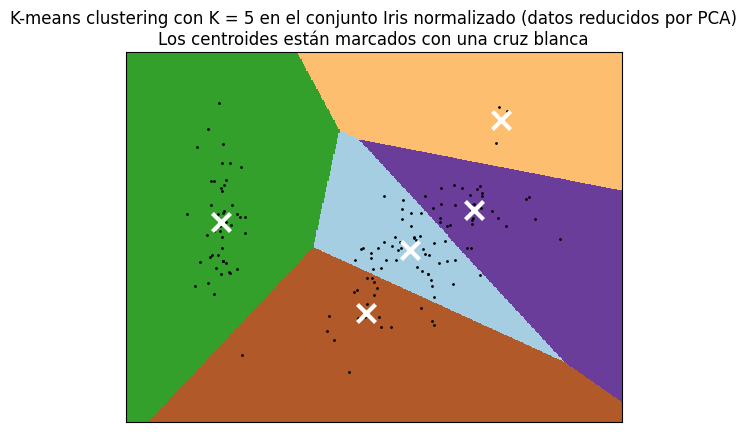

In [9]:
import numpy as np
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k_values = [2,3,4,5]

for k in k_values:
    
    X = iris_data_norm.drop(columns='Class').values
    y = iris_data_norm['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data_norm)
    
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        matriz_confusion = confusion_matrix(y, asignaciones)
        disp = ConfusionMatrixDisplay(matriz_confusion)
        disp.plot()
        plt.show()

# Apartado 5
Repetir el análisis de K-means con la librería Kmeans de
Scikit-learn y comparar los resultados con la
implementación propia

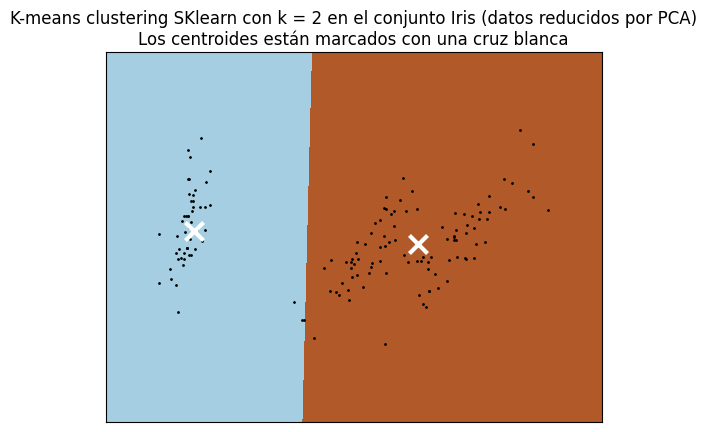

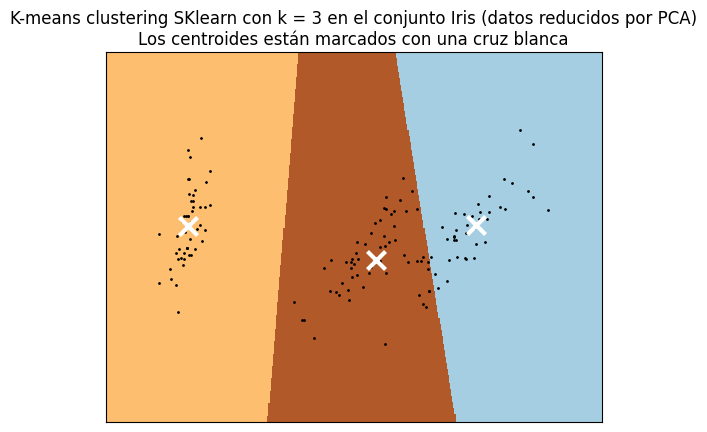

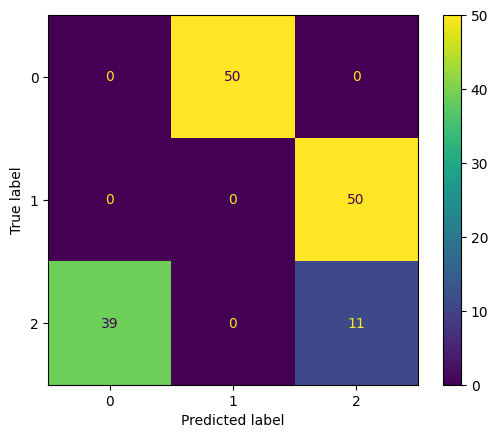

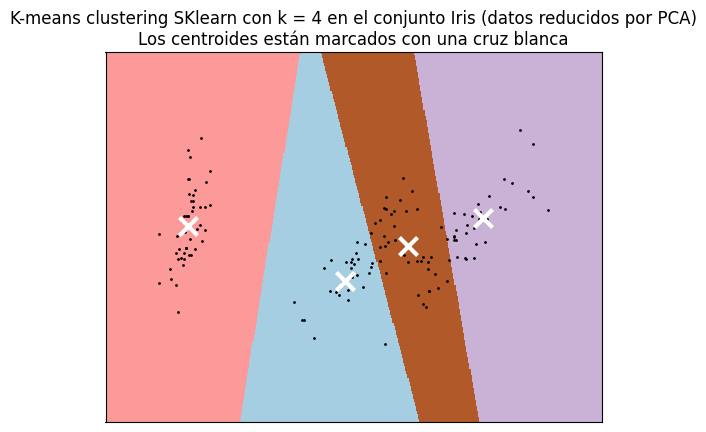

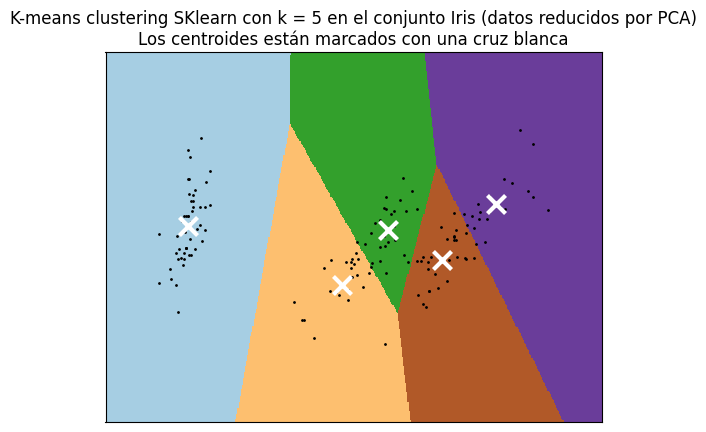

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data['Class'], kmeans.labels_)
        disp.plot()


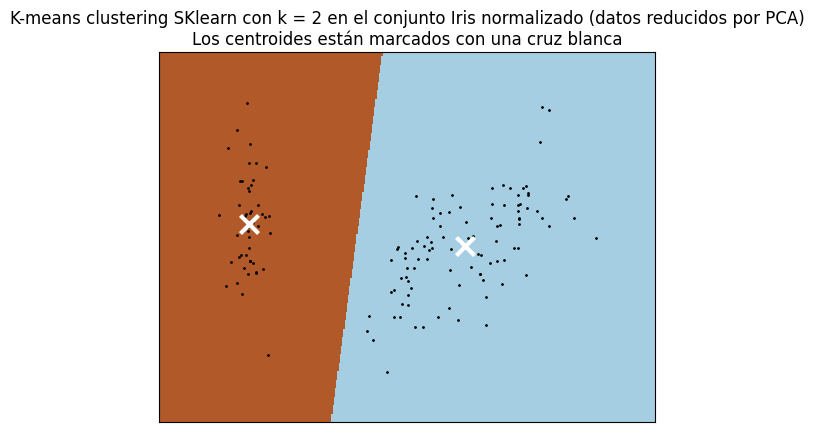

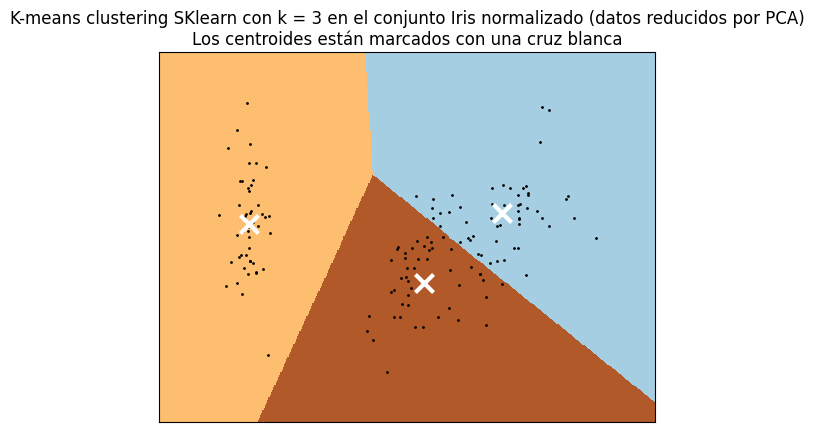

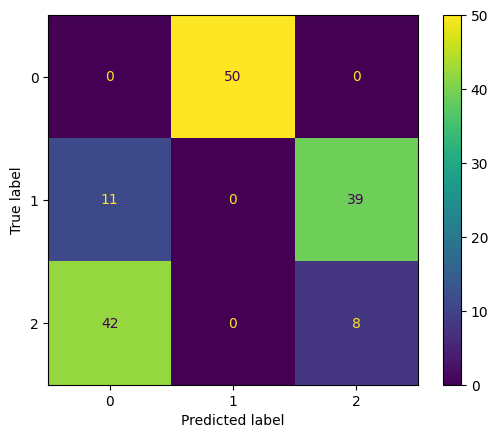

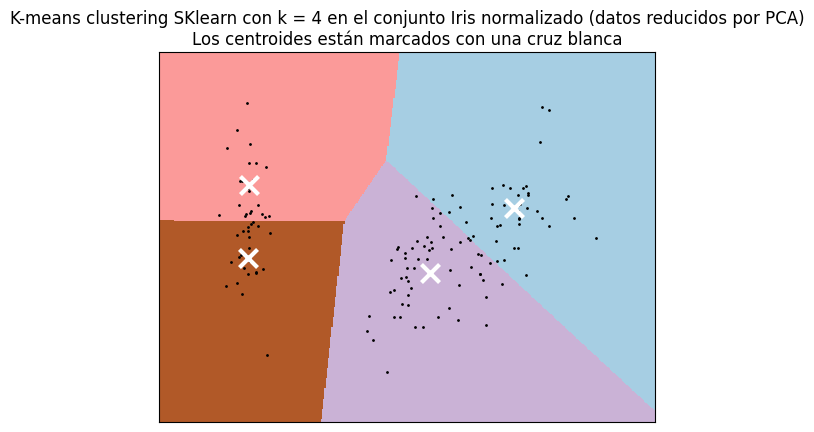

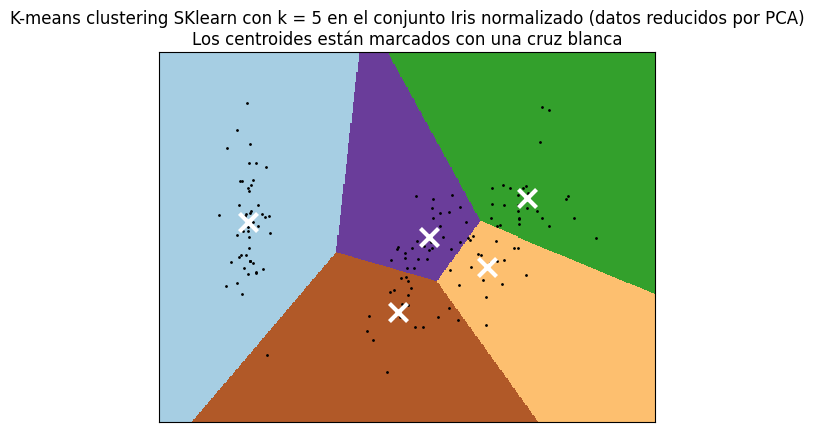

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data_norm)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data_norm['Class'], kmeans.labels_)
        disp.plot()
